In [1]:
!pip install kaggle
import os
import json
import pandas as pd
import numpy as np

**DATA COLLECTION**

In [2]:
from zipfile import ZipFile
kaggle_dictionary=json.load(open('/content/kaggle (1).json'))
os.environ['kaggle_username']=kaggle_dictionary['username']
os.environ['kaggle_key']=kaggle_dictionary['key']
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
with ZipFile('imdb-dataset-of-50k-movie-reviews.zip','r') as zip_ref:
  zip_ref.extractall()

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 93% 24.0M/25.7M [00:00<00:00, 123MB/s] 
100% 25.7M/25.7M [00:00<00:00, 112MB/s]


**PREPROCESSING**

In [3]:
import re
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
data=pd.read_csv('/content/IMDB Dataset.csv')
def preprocess_text(text):
    # Lowercasing the text
    text = text.lower()

    # Remove HTML tags, URLs, and special characters
    text = re.sub(r'<.*?>', '', text)       # Remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and numbers

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    return ' '.join(tokens)
data['cleaned_review'] = data['review'].apply(preprocess_text)

print(data[['review', 'cleaned_review']].head(7))

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   
5  Probably my all-time favorite movie, a story o...   
6  I sure would like to see a resurrection of a u...   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  
5  probably alltime favorite movie story selfless...  
6  sure would like see resurrection dated seahunt...  


**IMPORTING BERTopic FOR TOPIC MODELING**

In [ ]:
preprocessed_reviews=data['cleaned_review']
!pip install bertopic
from bertopic import BERTopic

# Initialize BERTopic
topic_model = BERTopic()

# Fit the model and transform the data
topics, probabilities = topic_model.fit_transform(preprocessed_reviews)

# Add the discovered topics to the dataset
data['topic'] = topics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

**ANALYZING SPECIFIC TOPIC**

In [ ]:
print(topic_model.get_topic_info(8))

   Topic  Count                          Name  \
0      8    267  8_western_stewart_wayne_ford   

                                      Representation  \
0  [western, stewart, wayne, ford, wagon, mann, w...   

                                 Representative_Docs  
0  [western divided many subgenres one broadest d...  


In [ ]:
print(topic_model.get_topic(27))

[('love', 0.01462130999789003), ('relationship', 0.006995479202497105), ('life', 0.006656783760126957), ('romantic', 0.006203755282493914), ('friendship', 0.00603747974203242), ('romance', 0.005173567773379974), ('heart', 0.005109263700876061), ('story', 0.004721821436639627), ('emotion', 0.00466008255495178), ('beautiful', 0.004659105038712355)]


**VISUALIZING SPECIFIC TOPIC**

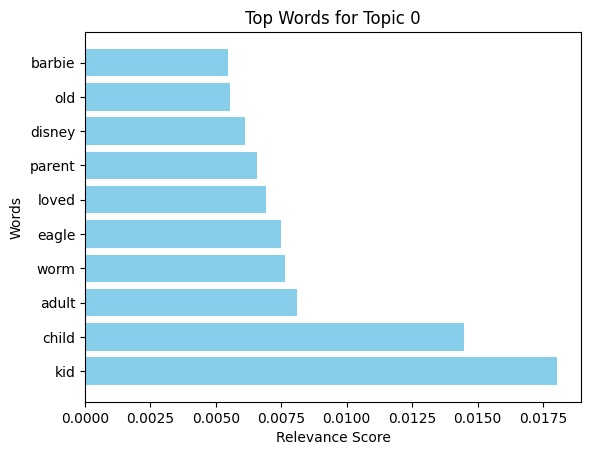

In [ ]:
import matplotlib.pyplot as plt

# Example: Top words for Topic 0
topic_words = dict(topic_model.get_topic(7))  # Get topic 0 words and their scores
words = list(topic_words.keys())
scores = list(topic_words.values())

# Plot the bar chart
plt.barh(words, scores, color='skyblue')
plt.title("Top Words for Topic 0")
plt.xlabel("Relevance Score")
plt.ylabel("Words")
plt.show()

**VISUALIZING ALL THE TOPICS **

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.save("bertopic_model")

2025-01-01 14:39:01,353 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
topic_info = topic_model.get_topic_info()
topic_info.to_csv("topic_info.csv", index=False)

**VISUALIZING TOP 10 TOPICS**

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

**BEST REVIEWS ACCORDING TO ASSIGNED TOPICS**

In [ ]:
# Filter for positive reviews (from earlier sentiment analysis)
best_reviews = data[data['sentiment'] == 'positive']

# Group by topic and find the best-reviewed reviews
best_by_topic = best_reviews.groupby('topic')['review'].apply(list)
print(best_by_topic)

topic
-1      [A wonderful little production. <br /><br />Th...
 0      [I just do not see what is so bad about this m...
 1      [What an absolutely stunning movie, if you hav...
 2      [I love to watch this movie a lot because of a...
 3      [this is one of the finest movies i have ever ...
                              ...                        
 487    [Many teenage sex comedy movies come and go wi...
 488    [Just watched Conrack for the first time. Alth...
 489    [Set in a California detention camp in an indi...
 490    [Filmmakers made a rather boring everyman's st...
 491    [Not for the squeamish, but the number of twis...
Name: review, Length: 477, dtype: object


**PERFORMING LDA FOR TOPIC MODELING**

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
count_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
doc_term_matrix = count_vectorizer.fit_transform(data['cleaned_review'])


In [10]:
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust 'n_components' to the desired number of topics
lda_model.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

**ASSIGNING TOPICS FOR REVIEWS**

In [11]:
doc_topic_matrix = lda_model.transform(doc_term_matrix)

# Assign the most probable topic to each review
data['Assigned_Topic'] = doc_topic_matrix.argmax(axis=1)

# Save the dataset with assigned topics
data.to_csv('reviews_with_topics.csv', index=False)
print("Assigned topics saved to 'reviews_with_topics.csv'.")

# Display a preview of reviews and their assigned topics
print("Sample of reviews with their assigned topics:")
print(data[['review', 'Assigned_Topic']].head(10))

Assigned topics saved to 'reviews_with_topics.csv'.
Sample of reviews with their assigned topics:
                                              review  Assigned_Topic
0  One of the other reviewers has mentioned that ...               2
1  A wonderful little production. <br /><br />The...               4
2  I thought this was a wonderful way to spend ti...               3
3  Basically there's a family where a little boy ...               0
4  Petter Mattei's "Love in the Time of Money" is...               3
5  Probably my all-time favorite movie, a story o...               0
6  I sure would like to see a resurrection of a u...               0
7  This show was an amazing, fresh & innovative i...               0
8  Encouraged by the positive comments about this...               0
9  If you like original gut wrenching laughter yo...               0


In [12]:
def display_topics(model, feature_names, no_top_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = ", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(f"Topic {topic_idx}: {top_words}")
        topics[topic_idx] = top_words
    return topics

# Get feature names
feature_names = count_vectorizer.get_feature_names_out()

# Display topics and get a dictionary of them
topics = display_topics(lda_model, feature_names)

# Mapping topic numbers to top words for better interpretation
data['Topic_Description'] = data['Assigned_Topic'].map(topics)

# Display reviews with topics and their descriptions
print("\nSample Reviews with Topic Descriptions:")
print(data[['review', 'Assigned_Topic', 'Topic_Description']].head(10))

Topic 0: movie, like, film, good, really, time, bad, dont, make, watch
Topic 1: episode, like, series, movie, time, little, good, character, girl, house
Topic 2: movie, like, people, time, film, make, man, war, character, story
Topic 3: film, character, performance, life, role, story, love, play, great, best
Topic 4: film, scene, character, like, story, movie, time, make, director, good

Sample Reviews with Topic Descriptions:
                                              review  Assigned_Topic  \
0  One of the other reviewers has mentioned that ...               2   
1  A wonderful little production. <br /><br />The...               4   
2  I thought this was a wonderful way to spend ti...               3   
3  Basically there's a family where a little boy ...               0   
4  Petter Mattei's "Love in the Time of Money" is...               3   
5  Probably my all-time favorite movie, a story o...               0   
6  I sure would like to see a resurrection of a u...             

**ASSIGINING GENRE**


In [24]:
import pandas as pd
import re

# Load the CSV file
file_path = "/content/IMDB Dataset.csv"
data = pd.read_csv(file_path)

# Created a  genre-keyword dictionary after analyzing all the topics
genre_keywords = {
    "drama": ["realistic", "family", "character", "emotional", "struggle", "intense","life","relationship","conflict","tragic","oz","human relations"],
    "comedy": ["hilarious", "funny", "joke", "humor", "laugh", "lighthearted","comedy"],
    "romance": ["heartwarming", "affection", "romantic", "lovestory", "passion","titanic","jack","love story","relations","lighthearted"],
    "adventure": ["journey", "exotic", "wild", "quest", "exploration","adventure","hero"],
    "sci-fi": ["space", "robot", "technology","alien","scifi","planet","Star Trek","jedi"],
    "horror": ["creepy", "scary", "terrifying", "fear", "haunting", "blood","ghost","exorcism","supernatural","horror","vampire","zombie"],
    "mystery": ["secret", "clue", "detective", "investigation", "enigma", "whodunit"],
    "documentary": [ "biography", "history","quantum","documentary"],
    "animation": ["cartoon", "colorful", "drawn", "animated","anime","pixar","disney","sosuke"],
    "action": ["combat", "fight", "battle", "explosion", "adrenaline", "chase","martial","kungfu","gun","kill","stunt","heroes","hero"],
    "thriller": ["suspense", "twist", "crime", "danger", "tension", "mystery","thrill","Abre los Ojos","thriller"],
    "crime": ["murder", "detective", "law", "gang", "investigation", "police","brutality","serial killer"],
    "fantasy": ["magic", "wizard", "epic", "dragon", "mythical", "imaginative","king","prince","princess","barbie"],
}

# Function to assign genres to a review
def assign_genres(review):
    assigned_genres = []
    for genre, keywords in genre_keywords.items():
        for keyword in keywords:
            if re.search(rf'\b{keyword}\b', review, re.IGNORECASE):
                assigned_genres.append(genre)
                break  # Avoid duplicate genres for the same keyword
    return ", ".join(assigned_genres) if assigned_genres else "unknown"


data["genre"] = data["review"].apply(assign_genres)


output_file_path = "/content/review_with_genre.csv"
data.to_csv(output_file_path, index=False)

print("Updated file with genre ")
df=pd.read_csv(output_file_path).head()

Updated file with genre 


In [25]:
print(data[['review', 'genre']].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                             genre  
0             drama, action, crime  
1                    drama, comedy  
2                    comedy, crime  
3  drama, horror, action, thriller  
4                   drama, romance  


**BEST POSITIVE AND NEGATIVE REVIEW BY GENRE**

In [27]:
def display_best_positive_negative_reviews(genre, data):

    genre_reviews = data[data['genre'] == genre]

    if genre_reviews.empty:
        print(f"No reviews found for the genre: {genre}")
        return


    positive_reviews = genre_reviews[genre_reviews['sentiment'] == 'positive']
    negative_reviews = genre_reviews[genre_reviews['sentiment'] == 'negative']


    if not positive_reviews.empty:
        best_positive = positive_reviews.loc[positive_reviews['review'].str.len().idxmax()]
        print(f"\nBest Positive Review for Genre: {genre}")
        print(best_positive['review'])
    else:
        print(f"\nNo positive reviews found for Genre: {genre}")


    if not negative_reviews.empty:
        worst_negative = negative_reviews.loc[negative_reviews['review'].str.len().idxmin()]
        print(f"\nWorst Negative Review for Genre: {genre}")
        print(worst_negative['review'])
    else:
        print(f"\nNo negative reviews found for Genre: {genre}")

genre = "horror"
display_best_positive_negative_reviews(genre, data)


Best Positive Review for Genre: horror
First of all, despite the low rating on this site, I saw something quite worthy in this film and will gladly defend it. And no, I'm not connected to the crew in any way...<br /><br />I came across the DVD of The Wind by accident, and had this strong feeling that it wasn't going to be quite like the video packaging described. So I took a chance, and was pleasantly surprised by this strange, very different drama. I'm assuming the DVD marketing and summary were the work of MTI Home Video to hook a rental or sale (the tag line "Love comes in many forms" was changed to "Terror comes in many forms"). Sure, smaller films' rentals and sales depend strongly on grabbing a person's attention, especially if they've never heard of the film before (a similar case happened with the film THE ITEM). That's probably what is working against this release, as horror fans read the description of an "ancient wind" carrying with it "omens of the apocalypse." It's easy t

In [28]:
positive_reviews = data[data['sentiment'] == 'positive']
negative_reviews = data[data['sentiment'] == 'negative']

# Group reviews by genre
best_reviews_by_genre = positive_reviews.groupby('genre')['review'].apply(list)
worst_reviews_by_genre = negative_reviews.groupby('genre')['review'].apply(list)

# Display best and worst reviews by genre
print("Best Reviews by Genre:")
print(best_reviews_by_genre)

print("\nWorst Reviews by Genre:")
print(worst_reviews_by_genre)

Best Reviews by Genre:
genre
action                      [What an absolutely stunning movie, if you hav...
action, crime               [This movie is without a doubt a perfect 10/10...
action, crime, fantasy      [Personally, I find the movie to be quite a go...
action, fantasy             [The quality of this movie is simply unmatched...
action, thriller            [And a made for TV movie too, this movie was g...
                                                  ...                        
thriller                    [This game ranks above all so far. I had the h...
thriller, crime             [Having finally caught up with this "masterpie...
thriller, crime, fantasy    ["Opera" is a great film with some wonderful,i...
thriller, fantasy           [In Nordestina, a village in the middle of now...
unknown                     [Probably my all-time favorite movie, a story ...
Name: review, Length: 1418, dtype: object

Worst Reviews by Genre:
genre
action                      [I really li

**ALL POSITIVE REVIEWS AND NEGATIVE REVIEWS BY GENRE**

In [30]:


def display_all_positive_negative_reviews(genre, data):


    genre_reviews = data[data['genre'] == genre]

    if genre_reviews.empty:
        print(f"No reviews found for the genre: {genre}")
        return


    positive_reviews = genre_reviews[genre_reviews['sentiment'] == 'positive']
    negative_reviews = genre_reviews[genre_reviews['sentiment'] == 'negative']


    print(f"\nAll Positive Reviews for Genre: {genre}")
    if not positive_reviews.empty:
        for idx, review in enumerate(positive_reviews['review'], start=1):
            print(f"{idx}. {review}")
    else:
        print(f"No positive reviews found for Genre: {genre}")


    print(f"\nAll Negative Reviews for Genre: {genre}")
    if not negative_reviews.empty:
        for idx, review in enumerate(negative_reviews['review'], start=1):
            print(f"{idx}. {review}")
    else:
        print(f"No negative reviews found for Genre: {genre}")


genre = "horror"
display_all_positive_negative_reviews(genre, data)


All Positive Reviews for Genre: horror
1. this movie gets a 10 because there is a lot of gore in it.who cares about the plot or the acting.this is an Italian horror movie people so you know you can't expect much from the acting or the plot.everybody knows fulci took footage from other movies and added it to this one.since i never seen any of the movies that he took footage from it didn't matter to me.the Italian godfather of gore out done himself with this movie.this is one of the goriest Italian movies you will ever see.no gore hound should be without this movie in their horror movie collection.buy this movie no matter what it is a horehounds dream come true.
2. I love to watch this movie a lot because of all the scary scenes about the raptors. I like raptors because they are scary. My favorite parts are the ones where the raptor looks behind the pillar because it reminds me of a scene from the Friday the 13th movie with the girl who eats the banana.<br /><br />I really love to watch